In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

df = pd.read_csv(r'C:\Users\Selva Karthik\Downloads\Mall_Customers_1712655402567.csv')
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
df.dropna()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:

label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [13]:
scaler = StandardScaler()
df[['a','b','c','d','e']] = scaler.fit_transform(df[['CustomerID','Genre','Age','Annual_Income_(k$)','Spending_Score']])
df


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,a,b,c,d,e
0,1,1,19,15,39,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,2,1,21,15,81,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,3,0,20,16,6,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,4,0,23,16,77,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,5,0,31,17,40,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,197,0,45,126,28,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,198,1,32,126,74,1.688771,1.128152,-0.491602,2.497807,0.923953
198,199,1,32,137,18,1.706091,1.128152,-0.491602,2.917671,-1.250054


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[400.0, 269.69101219276394, 157.70400815035947, 108.92131661364357, 65.56840815571681, 55.525147431877166, 52.47514078430879, 37.667323037468265, 34.436473180344336]


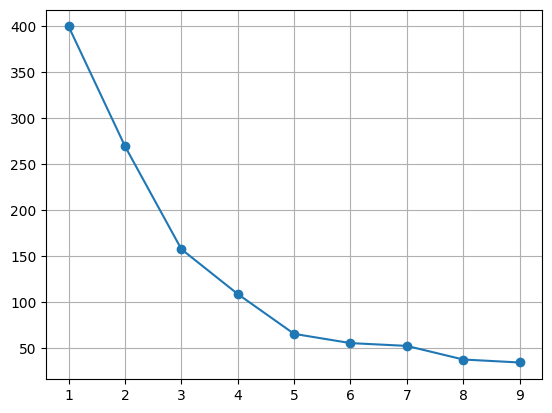

In [14]:
means = []
inertia = []
def k_means(data,max_k):
     for k in range(1,max_k):
          kmeans=KMeans(n_clusters=k)
          kmeans.fit(data)

          means.append(k)
          inertia.append(kmeans.inertia_)
     plt.plot(means,inertia,'o-')
     plt.grid(True)
     print(means)
     print(inertia)
k_means(df[['d','e']],10)
      

In [15]:
Kmeans = KMeans(n_clusters=4)
Kmeans.fit(df[['d','e']])

KMeans(n_clusters=4)

In [16]:
df['kmeans'] = Kmeans.labels_
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,a,b,c,d,e,kmeans
0,1,1,19,15,39,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,1
1,2,1,21,15,81,-1.706091,1.128152,-1.281035,-1.738999,1.195704,3
2,3,0,20,16,6,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,1
3,4,0,23,16,77,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,3
4,5,0,31,17,40,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,1.654129,-0.886405,-0.276302,2.268791,1.118061,2
196,197,0,45,126,28,1.671450,-0.886405,0.441365,2.497807,-0.861839,0
197,198,1,32,126,74,1.688771,1.128152,-0.491602,2.497807,0.923953,2
198,199,1,32,137,18,1.706091,1.128152,-0.491602,2.917671,-1.250054,0


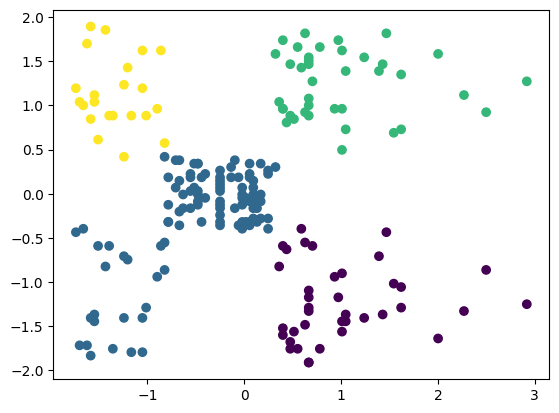

In [17]:
plt.scatter(df['d'],df['e'],c=df['kmeans'])
